# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 상권별 업종밀집통계정보를 다운로드 받아봅니다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from plotnine import *

# 상가업소정보 2017년 9월

In [3]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 4820-D44C

 C:\Users\채송이\data\baeroT 디렉터리

2018-08-07  오전 12:08    <DIR>          .
2018-08-07  오전 12:08    <DIR>          ..
2018-08-06  오후 02:41    <DIR>          .ipynb_checkpoints
2018-07-20  오전 01:23           196,873 10miniutes to Pandas 한글 번역.ipynb
2018-07-12  오후 07:31           660,547 2017 캐글 설문조사 분석.ipynb
2018-08-07  오전 12:00           616,514 dataitgirls_shop - 숙박.ipynb
2018-08-07  오전 12:00           616,514 dataitgirls_shop.ipynb
2018-07-31  오후 04:07           783,823 dataitgirls2-kaggle-nlp.ipynb
2018-07-30  오후 02:25           180,473 petition_classification.ipynb
2018-08-02  오후 04:39           185,556 petition-pandas-question.ipynb
2018-07-19  오후 04:01            13,332 plotnine.ipynb
2018-08-06  오후 03:31       206,197,749 shop_201709_01.csv
2018-07-09  오후 04:17            43,478 강력범죄.과제.07.03~07.04.ipynb
2018-08-05  오후 11:53             8,619 범죄통계 데이터 탐색하기.ipynb
2018-07-27  오후 01:01           146,153 송이 binary_classification.ipynb
2018-

In [4]:
# 상가업소정보 2017년 9월 데이터
shop_201709_01 = pd.read_csv('shop_201709_01.csv', encoding='cp949')
shop_201709_01.shape

(460822, 39)

In [5]:
shop_201709_01.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
2,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774


In [6]:
shop_201709_01.tail(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
460819,15898705,팝콘피씨,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,1121510700101710000026151,NaN,서울특별시 광진구 광나루로26길 40,143926,5022.0,NaN,1,NaN,127.078059,37.545272
460820,15883107,키즈코코,NaN,D,소매,D05,의복의류,D05A05,아동복판매,G47416,...,2614010600101660006000001,대신롯데캐슬,부산광역시 서구 대티로 161,602093,49208.0,NaN,NaN,NaN,129.010414,35.116648
460821,15915239,하서족발,NaN,Q,음식,Q01,한식,Q01A08,족발/보쌈전문,I56111,...,2671025622107170008000001,서진프라자,부산광역시 기장군 정관읍 정관7로 34,619963,46015.0,NaN,NaN,107,129.178633,35.321823


In [7]:
# 생각보다 결측치가 많다.
shop_201709_01.isnull().sum()

상가업소번호            0
상호명               1
지점명          405614
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      25931
표준산업분류명       27032
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         77841
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        399010
건물관리번호            0
건물명          258433
도로명주소             0
구우편번호             0
신우편번호            11
동정보          416558
층정보          199326
호정보          388686
경도                2
위도                2
dtype: int64

In [8]:
shop_201709_01.loc[shop_201709_01['위도'].isnull()]
#null인 값을 보여줘

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
275711,6019251,파워라인휘트니스클럽,NaN,P,스포츠,P02,실내운동시설,P02A13,헬스클럽,R91132,...,V0000000000000259889,NaN,서울특별시 성북구 서경로11길 0,136840,NaN,NaN,NaN,NaN,NaN,NaN
291170,24111979,파워라인휘트니스클럽,NaN,P,스포츠,P02,실내운동시설,P02A13,헬스클럽,R91132,...,V0000000000000197124,NaN,서울특별시 성북구 서경로11길 0,136103,2708.0,NaN,NaN,6,NaN,NaN


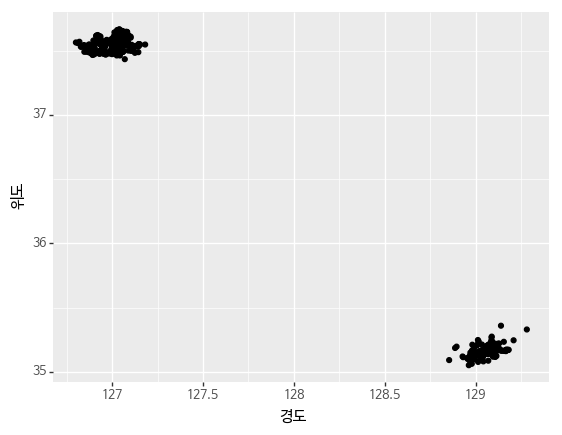

<ggplot: (143545583729)>

In [9]:
# 모든 데이터를 한번에 찍으면 너무 오래 걸려서 1000개만 찍어봅니다.
# 양쪽에 데이터가 몰려있는데 왜 그런지 주소 정보를 다시보겠습니다.
(ggplot(shop_201709_01[:400])
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)
#서울과 부산만 있음

In [10]:
# 데이터를 보니 서울과 부산만 있는거 같습니다. 
# 그래서 서울과 그 외 데이터로 나눠봤습니다.
shop_seoul = shop_201709_01.loc[shop_201709_01['도로명주소'].str.startswith('서울')]
shop_except_seoul = shop_201709_01.loc[~shop_201709_01['도로명주소'].str.startswith('서울')] #~아닌거
print(shop_seoul.shape)
print(shop_except_seoul.shape)

(324817, 39)
(136005, 39)


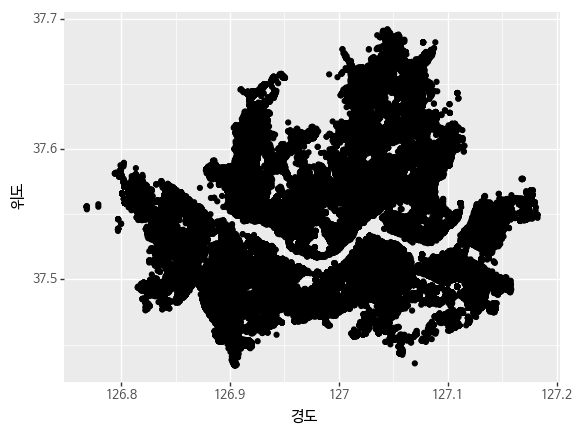

<ggplot: (-9223371893309192048)>

In [11]:
# 서울만 찍어봤더니 서울지도 비슷하게 나옵니다.
(ggplot(shop_seoul)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [12]:
print(shop_201709_01.shape)
shop_201709_01['시도'] = shop_201709_01['도로명주소'].str.split(' ', expand=True)[0]
shop_201709_01['구군'] = shop_201709_01['도로명주소'].str.split(' ', expand=True)[1]
print(shop_201709_01.shape)
shop_201709_01.columns

(460822, 39)
(460822, 41)


Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '시도', '구군'],
      dtype='object')

In [13]:
shop_seoul['상권업종소분류명'].value_counts()

한식/백반/한정식      21952
여성미용실          14785
커피전문점/카페/다방    14262
부동산중개          12491
일반의류           11567
편의점             8292
종합소매            8138
호프/맥주           7068
라면김밥분식          6416
학원-입시           6012
세탁소/빨래방         5549
화장품판매점          5226
비만/피부관리         4792
어린이집            4564
수퍼마켓            4552
후라이드/양념치킨       4546
갈비/삼겹살          4067
학원(종합)          4029
노래방             3923
자동차정비/카센타       3371
정통양식/경양식        3302
제과점             3262
핸드폰소매           3015
학원-외국어/어학       2802
국수/만두/칼국수       2543
중국음식/중국집        2522
식료품점            2476
꽃집/꽃배달          2405
피아노/바이올린/기타     2313
남성미용실           2303
               ...  
패션쇼대행              1
학원-목욕관리사           1
등세공품판매             1
프로축구               1
학원-도배              1
학원-세탁기술            1
초상화제작              1
특수사진기              1
박제표본               1
학원-기계/금형기술         1
토종닭전문              1
학원-스튜디어스           1
학원-간판디자인           1
학원-양재              1
화환/화분대여            1
실내스케이트장            1
미용실-어린이      

In [14]:
shop_seoul['표준산업분류명'].value_counts()

한식 음식점업                   41364
두발미용업                     14730
셔츠 및 기타 의복 소매업            14529
비알콜 음료점업                  14457
부동산 자문 및 중개업              12542
분식 및 김밥 전문점               10857
그외 기타 종합 소매업              10137
일반 교과 학원                  10046
기타 주점업                     9734
체인화 편의점                    8260
가정용 세탁업                    5586
화장품 및 방향제 소매업              5243
서양식 음식점업                   5153
제과점업                       5074
보육시설 운영업                   4787
슈퍼마켓                       4543
치킨 전문점                     4538
기타 섬유, 직물 및 의복액세서리 소매업     4260
노래연습장 운영업                  3915
예술 학원                      3811
기타 식료품 소매업                 3751
일식 음식점업                    3726
일반유흥 주점업                   3692
건강보조식품 소매업                 3298
통신기기 소매업                   3176
외국어학원                      3080
페인트, 유리 및 기타 건설자재 소매업      2887
문구용품 소매업                   2575
중식 음식점업                    2540
육류 소매업                     2461
                          ...  
청소년수련시설 

In [15]:
shop_seoul['상호명'].value_counts()

GS25               1524
CU                 1429
세븐일레븐               933
개별용달                443
크린토피아               336
이디야커피               334
SK텔레콤               296
스타벅스                240
파리바게뜨               219
김밥천국                214
위드미                 205
미니스톱                196
유플러스스퀘어             189
아리따움                174
티월드                 168
태후사랑                167
부동산                 155
BBQ치킨               149
쥬씨                  146
BHC치킨               141
전주식당                130
커피빈                 124
네이처리퍼블릭             123
뚜레쥬르                121
올리브영                114
이니스프리               111
미샤                  108
피자스쿨                108
다이소                 105
삼화페인트               103
                   ... 
희성텍스타일                1
아크론테크교역               1
영일주방                  1
금장한식                  1
아카쿠스                  1
아카데미마사지샵              1
상도더샵엉어교습소             1
뽀글뚝배기냠냠비빔밥            1
지오다노송파GS스퀘어           1
양평해장국,부대찌개,돈까스        1
고영애한복           

In [16]:
# 서울만 찍어봤더니 서울지도 비슷하게 나옵니다.
# 서울 DF을 다시 만들어 줍니다.
shop_seoul = shop_201709_01.loc[shop_201709_01['도로명주소'].str.startswith('서울')]
shop_seoul.shape

(324817, 41)

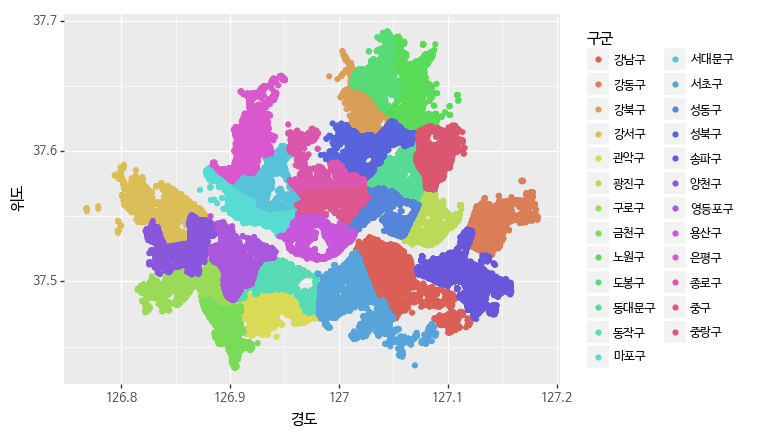

<ggplot: (143606672553)>

In [17]:
(ggplot(shop_seoul)
 + aes(x='경도', y='위도', color='구군')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

In [18]:
shop_seoul['상권업종대분류명'].value_counts()

소매          110843
음식          106023
생활서비스        52821
학문/교육        26712
부동산          13285
관광/여가/오락      9383
스포츠           3124
숙박            2626
Name: 상권업종대분류명, dtype: int64

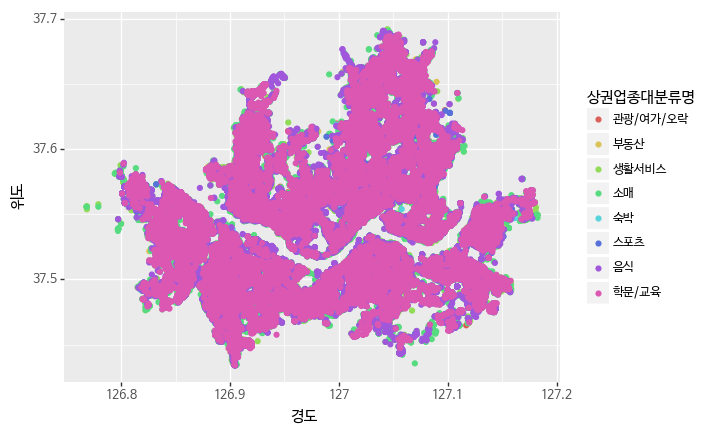

<ggplot: (143600114475)>

In [82]:
(ggplot(shop_seoul)
 + aes(x='경도', y='위도', color='상권업종대분류명')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

## 숙박과 관련된 지도 보기

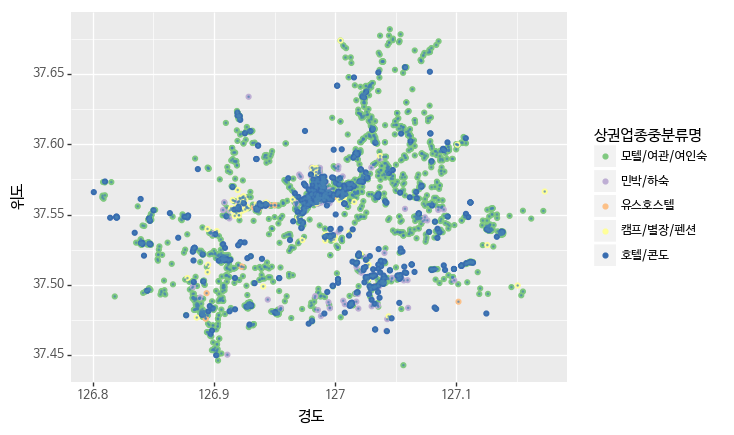

<ggplot: (143603189340)>

In [86]:
shop_seoul_sleep = shop_seoul.loc[shop_seoul['상권업종대분류명'] == '숙박']

(ggplot(shop_seoul_sleep)
 + aes(x='경도', y='위도', color='상권업종중분류명')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_color_brewer(type='qual')
 + geom_point(color='steelblue', alpha=0.5, size=0.1)
)

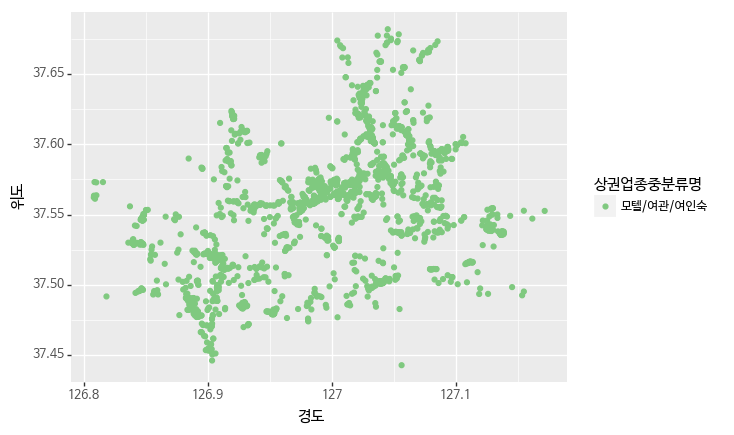

<ggplot: (-9223371893259836058)>

In [91]:
shop_seoul_sleep = shop_seoul.loc[shop_seoul['상권업종중분류명'] == '모텔/여관/여인숙']

(ggplot(shop_seoul_sleep)
 + aes(x='경도', y='위도', color='상권업종중분류명')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_color_brewer(type='qual')
)

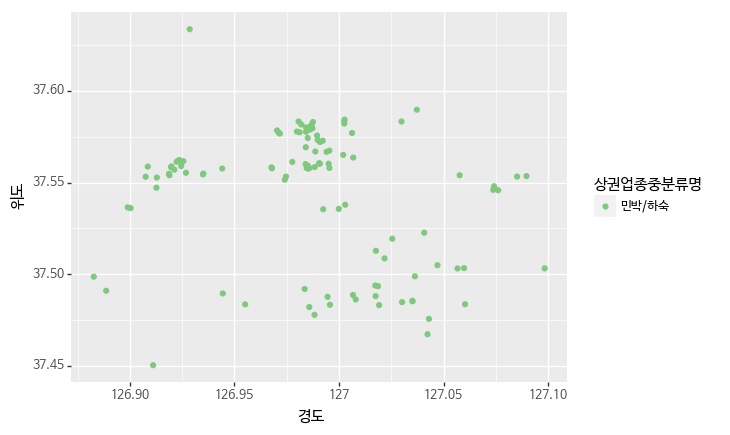

<ggplot: (-9223371893251968554)>

In [88]:
shop_seoul_sleep = shop_seoul.loc[shop_seoul['상권업종중분류명'] == '민박/하숙']

(ggplot(shop_seoul_sleep)
 + aes(x='경도', y='위도', color='상권업종중분류명')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_color_brewer(type='qual')
)

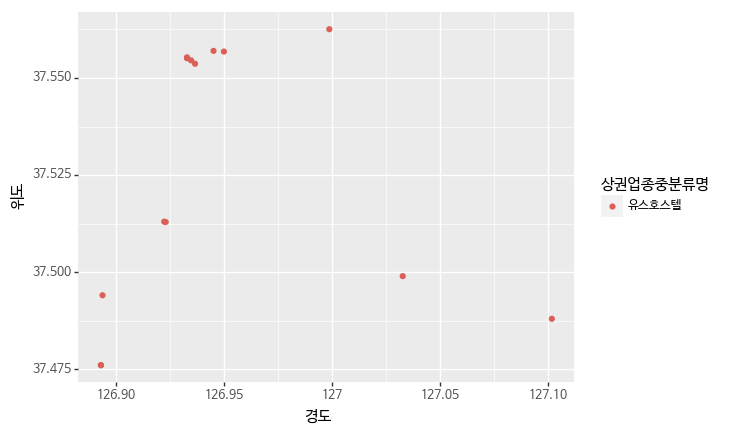

<ggplot: (143589697898)>

In [64]:
shop_seoul_sleep = shop_seoul.loc[shop_seoul['상권업종중분류명'] == '유스호스텔']

(ggplot(shop_seoul_sleep)
 + aes(x='경도', y='위도', color='상권업종중분류명')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

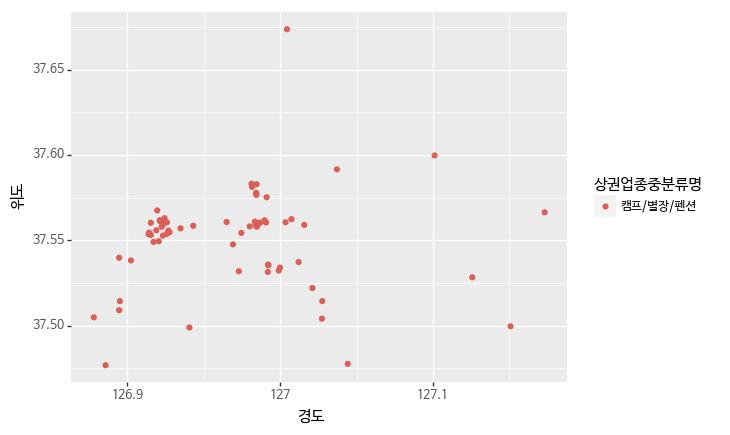

<ggplot: (-9223371893259843184)>

In [65]:
shop_seoul_sleep = shop_seoul.loc[shop_seoul['상권업종중분류명'] == '캠프/별장/펜션']

(ggplot(shop_seoul_sleep)
 + aes(x='경도', y='위도', color='상권업종중분류명')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

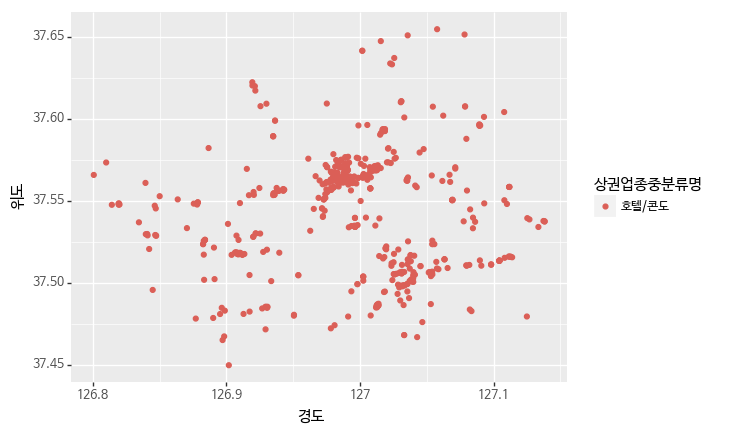

<ggplot: (143601797850)>

In [93]:
shop_seoul_sleep = shop_seoul.loc[shop_seoul['상권업종중분류명'] == '호텔/콘도']

(ggplot(shop_seoul_sleep)
 + aes(x='경도', y='위도', color='상권업종중분류명')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

In [84]:
shop_seoul_edu.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '시도', '구군'],
      dtype='object')

## 서울에 있는 호텔 위치파악!

In [94]:
import folium
geo_df = shop_seoul_sleep
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12,tiles='Stamen Watercolor')

for n in geo_df.index:
    sleep_name = geo_df['상호명'][n] + ' - ' + geo_df['도로명주소'][n]
    folium.Marker([geo_df['위도'][n], geo_df['경도'][n]], popup=sleep_name).add_to(map)
    
map

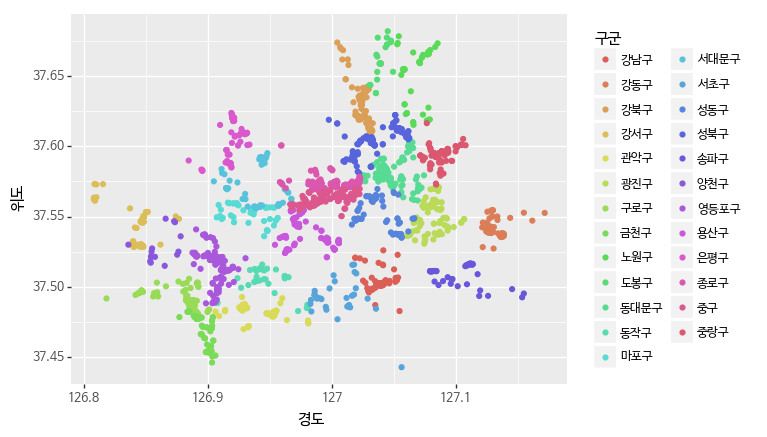

<ggplot: (143487677974)>

In [96]:
shop_seoul_sleep = shop_seoul.loc[shop_seoul['상권업종중분류명'] == '모텔/여관/여인숙']

(ggplot(shop_seoul_sleep)
 + aes(x='경도', y='위도', color='구군')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)